# PREPARATION

## import librairies

In [1]:
# Machine Lerning
import tensorflow as tf
import keras as ks

# Indispensables
import pandas as pd
import numpy as np
import geopandas as gpd
import math

# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name)
print(platform.system())
print(platform.release())
#
import argparse
from datetime import datetime
import h5py
import importlib

# VISU
from IPython.display import Image, IFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

# IMAGES
from PIL import Image
import rasterio
import imageio

import colorsys
print('TensorFlow: %s' % tf.__version__)
print('Kerasw: %s' % ks.__version__)
print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)
print('Geo Panda version: %s' % gpd.__version__)

%matplotlib inline

/Users/pl/anaconda3/envs/geo_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/pl/anaconda3/envs/geo_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/pl/anaconda3/envs/geo_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/pl/anaconda3/envs/geo_env/lib/python3.7/site-

posix
Darwin
18.0.0
TensorFlow: 1.13.1
Kerasw: 2.3.1
Panda version: 0.25.3
Numpy version: 1.17.3
Geo Panda version: 0.6.2


## Déclaration des directories et variables

In [2]:
BASE_DIR = os.getcwd()

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
    DATA_DIR3 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA2/"
    DATA_DIR3 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    DATA_DIR3 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"
    separe = "\\"   
    
DALLE_NUM = DATA_DIR + "DallesNumPoints5m" + separe
DALLE_ECA = DATA_DIR + "DallesEcartZ5m" + separe
DALLE_POS = DATA_DIR + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK
Data ROOT directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/


['/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK',
 '/Users/pl/anaconda3/envs/geo_env/lib/python37.zip',
 '/Users/pl/anaconda3/envs/geo_env/lib/python3.7',
 '/Users/pl/anaconda3/envs/geo_env/lib/python3.7/lib-dynload',
 '',
 '/Users/pl/anaconda3/envs/geo_env/lib/python3.7/site-packages',
 '/Users/pl/anaconda3/envs/geo_env/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pl/.ipython',
 '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/',
 '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m\\']

## création des listes d'images

In [3]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_1 = [f for f in glob.glob(DALLE_NUM + separe + "*.tif", recursive=True)]#   #only first N for test
liste_2 = [f for f in glob.glob(DALLE_ECA + separe + "*.tif", recursive=True)]#
liste_3 = [f for f in glob.glob(DALLE_POS + separe + "*.tif", recursive=True)]#
print(len(listdir(DALLE_NUM)), len(liste_1), len(liste_2), len(liste_3))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58771 29384 29384 29384
58771 58773 58768


# DONNEES

## TEST:  Lecture des images

In [25]:
print(liste_1[:2])
fichier1 = liste_1[0]
im1 = imageio.imread(fichier1)
print(im1.shape)
df1 = pd.DataFrame(im1)
print(df1)

df1.describe()

['/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043020_7272860_NumPoints5m.tif', '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042520_7272025_NumPoints5m.tif']
(10, 10)
     0    1    2    3    4    5    6    7    8    9
0  6.0  5.0  3.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1  3.0  1.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  1.0  7.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  1.0  4.0  2.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0
6  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0
7  0.0  0.0  0.0  2.0  0.0  0.0  2.0  6.0  1.0  1.0
8  1.0  1.0  0.0  0.0  0.0  0.0  1.0  6.0  1.0  0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  4.0  1.0


,0,1,2,3,4,5,6,7,8,9
count,10.00,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.00,0.700000,0.300000,0.900000,1.400000,0.600000,0.700000,1.700000,0.700000,0.200000
std,2.00,1.567021,0.948683,0.994429,2.366432,0.966092,0.823273,2.451757,1.251666,0.421637
min,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
75%,0.75,0.750000,0.000000,1.000000,1.750000,1.500000,1.000000,2.500000,1.000000,0.000000
max,6.00,5.000000,3.000000,3.000000,7.000000,2.000000,2.000000,6.000000,4.000000,1.000000


## lecture/creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [5]:
# Intialisation des variables de la dalle
fich_lamp  = DATA_DIR  + "LampadairePresence_0_1_5m.asc"
fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"

header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
print(lampadaires.sum().head(5))
print(lampadaires.nunique().agg(['mean','count','sum']))
##################################
# reconstruit le tableau dans le bon schéma usuel
# calcule la transposee
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes, mais pas nécessaire)
lampadaires = lampadaires[lampadaires.columns[::-1]]
##################################
lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
print(lampadaires.sum().sum())
lampes2.head(5)

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64
(200, 200) (40000, 1) (355, 5)
357.0


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847


## rempli le dataframe lampes0 et lampes1

In [6]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
print(lampes0.dtypes)
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
# extraction des lampadaires
lampes1 = lampes0[lampes0['present'] > 0]
print("Dalle:", lampes0.shape, "Nbre lampadaires:", lampes1.shape)
lampes0.head()

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object
Dalle: (40000, 9) Nbre lampadaires: (357, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [7]:
lampes1.tail(8)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
39336,1,39336,136,196,2043480,7272680,2043480_7272680_NumPoints5m.tif,2043480_7272680_EcartZ5m.tif,2043480_7272680_Position5m.tif
39384,1,39384,184,196,2043480,7272920,2043480_7272920_NumPoints5m.tif,2043480_7272920_EcartZ5m.tif,2043480_7272920_Position5m.tif
39520,1,39520,120,197,2043485,7272600,2043485_7272600_NumPoints5m.tif,2043485_7272600_EcartZ5m.tif,2043485_7272600_Position5m.tif
39570,1,39570,170,197,2043485,7272850,2043485_7272850_NumPoints5m.tif,2043485_7272850_EcartZ5m.tif,2043485_7272850_Position5m.tif
39577,1,39577,177,197,2043485,7272885,2043485_7272885_NumPoints5m.tif,2043485_7272885_EcartZ5m.tif,2043485_7272885_Position5m.tif
39685,1,39685,85,198,2043490,7272425,2043490_7272425_NumPoints5m.tif,2043490_7272425_EcartZ5m.tif,2043490_7272425_Position5m.tif
39756,1,39756,156,198,2043490,7272780,2043490_7272780_NumPoints5m.tif,2043490_7272780_EcartZ5m.tif,2043490_7272780_Position5m.tif
39763,1,39763,163,198,2043490,7272815,2043490_7272815_NumPoints5m.tif,2043490_7272815_EcartZ5m.tif,2043490_7272815_Position5m.tif


In [8]:
print(lampes1.shape, lampes0.shape)
lampes1.head(240).tail(20)


(357, 9) (40000, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
27731,1,27731,131,138,2043190,7272655,2043190_7272655_NumPoints5m.tif,2043190_7272655_EcartZ5m.tif,2043190_7272655_Position5m.tif
27747,1,27747,147,138,2043190,7272735,2043190_7272735_NumPoints5m.tif,2043190_7272735_EcartZ5m.tif,2043190_7272735_Position5m.tif
28103,1,28103,103,140,2043200,7272515,2043200_7272515_NumPoints5m.tif,2043200_7272515_EcartZ5m.tif,2043200_7272515_Position5m.tif
28125,1,28125,125,140,2043200,7272625,2043200_7272625_NumPoints5m.tif,2043200_7272625_EcartZ5m.tif,2043200_7272625_Position5m.tif
28131,1,28131,131,140,2043200,7272655,2043200_7272655_NumPoints5m.tif,2043200_7272655_EcartZ5m.tif,2043200_7272655_Position5m.tif
28193,1,28193,193,140,2043200,7272965,2043200_7272965_NumPoints5m.tif,2043200_7272965_EcartZ5m.tif,2043200_7272965_Position5m.tif
28256,1,28256,56,141,2043205,7272280,2043205_7272280_NumPoints5m.tif,2043205_7272280_EcartZ5m.tif,2043205_7272280_Position5m.tif
28393,1,28393,193,141,2043205,7272965,2043205_7272965_NumPoints5m.tif,2043205_7272965_EcartZ5m.tif,2043205_7272965_Position5m.tif
28463,1,28463,63,142,2043210,7272315,2043210_7272315_NumPoints5m.tif,2043210_7272315_EcartZ5m.tif,2043210_7272315_Position5m.tif
28464,1,28464,64,142,2043210,7272320,2043210_7272320_NumPoints5m.tif,2043210_7272320_EcartZ5m.tif,2043210_7272320_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [24]:
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

off = 20000
NN = 0
NM = NN + off

dal = ['nom_NUM', 'nom_ECA', 'nom_POS']
listes = [liste_1, liste_2, liste_3]
data = ['data1', 'data12', 'data3']
#### Pour eviter les fichiers manquants
# Compare les deux SETS (impossible avec des listes)
for m in range(1,4):
    print("M:", m)
    set_A = set(DALLE_NUM + lampes1[dal[m-1]])
    set_B = set(listes[m-1])
    set_C1 = set_A & set_B
    set_C2 = set_B - set_A
    liste_C = list(set_C2)
    liste_extraite = list(liste_C[NN:NM]) + list(set_C1)
    #liste_extraite = list(set(list(liste_1[NN:NM]) + list(set_C1)))
    print(len(set_B), len(set_A), len(set_C1), len(set_C2), len(liste_1), len(liste_extraite))

    data[m-1] = np.array([np.array(imageio.imread(fname)) for fname in liste_extraite])
    #  Ne fonctionne pas np.array(load_img(fname)) for fname in list_lamp0
    data[m-1].shape

    fichier = DATA_DIR3 + "data_LAS_" + str(dal[m-1]) + "_" + str(off) + ".npy"

    np.save(fichier, data[m-1])

    # fichier de c
    liste_y1 = [ 0 for x in range(len(liste_C[NN:NM]))]
    liste_y2 = [ 1 for x in range(len(list(set_C1)))]
    liste_y = liste_y1 + liste_y2
    print(len(liste_y1), len(liste_y2))
    len(liste_y)


M: 1
29384 357 352 29032 29384 20352


(20352, 10, 10)

20000 352


20352

M: 2
29384 357 0 29384 29384 20000


(20000, 10, 10)

20000 0


20000

M: 3
29384 357 0 29384 29384 20000


(20000, 10, 10)

20000 0


20000

### Lecture de TOUS les fichiers
5s pour 100 fichiers

~45mn ???    pour 40000 fichiers

### création de la table de 200-300 colonnes

In [21]:
#  limitation à 1000-5000 valeurs
off = 2000
off = len(lampes0)
NN = 0
NM = NN + off

n_row2 =  10   #TODO mettre le produit des dimension de la matrice image
n_col2 =  10
N2 = n_row2*n_col2  # N=100

#################################################
#################################################
###   TODO ... regarder l'unicité des 2 listes
#################################################
#################################################

### assemble 2 listes (lampadaires totale + NM * valeurs au hazard ... fichiers unique)
#list_lamp0 = list(set(lampes0['nom_NUM'][NN:NM] + list(DALLE_NUM + list_lamp1)))
list_lamp0 = list(DALLE_NUM + lampes0['nom_NUM'][NN:NM]) + list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp0b = list(lampes0['present'][NN:NM]) + list(lampes1['present'])
#lamp0 = np.array(list_lamp0b)
list_lamp1 = list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp2 = list(DALLE_ECA + lampes1['nom_ECA'])
print(list_lamp0[:2])
print(list_lamp0b[:2])
#print(list_lamp1[:2])
#print(list_lamp2[:2])
print(len(list_lamp0), len(list_lamp0b), len(list_lamp1), len(list_lamp2))

i=0
for n,fich1 in enumerate(list_lamp0):
    if n%500 == 1:
        print(n, list_lamp0b[n])
    fich2 = fich1.replace("NumPoints5m", "EcartZ5m")
    #fich3 = fich1.replace("NumPoints5m", "Position5m")
    #fiche3 = DALLE_POS+fich3
    
# fichiers dalles manquantes ???? ... pourquoi ?????
    if os.path.exists(fich1) and os.path.exists(fich2):    # Manque des fichiers sur les 40000
        i += 1
        if i%1000 == 1:
            print(n, i, list_lamp0b[n])
        data1 = np.reshape(imageio.imread(fich1), N2) #.flatten()
        data1T = np.expand_dims(data1, axis=0)
        data2 = np.reshape(imageio.imread(fich2), N2)
        data2T = np.expand_dims(data2, axis=0)
        #data3 = np.reshape(imageio.imread(fiche3), N2)
        #data3T = np.expand_dims(data3, axis=0)
        #print(i, data1T.shape, data2T.shape, data3T.shape)
        df_int1 = pd.DataFrame(data1T, index=[i])  #, index=indices)
        df_int2 = pd.DataFrame(data2T, index=[i])  
        #df_int3 = pd.DataFrame(data3T, index=[i])
        # MERGE 
        #df_inta = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        #df_int = df_inta.merge(df_int3, left_index=True, right_index=True)
        df_int = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        df_int['label'] = list_lamp0b[n]    #
        if i == 1:
            #print(dataT)
            df3 = df_int
        else:
            df3 = pd.concat([df3, df_int])
    else:
        pass     #print(fiche1, fich2)
if i > 0:
    print(n+1, i, n+1-i, df3.shape, df3.shape[0]/i)

for n in range(0,N2):
    df3 = df3.astype({str(n)+'_num': 'int8'}, copy=False)
#print(df3.dtypes)
df3

#  TODO rajouter une colonne de présence ( comparer avec SORTIE :  0 ou 1)
#####################################################
#  remplir une colonne de zéro
#  puis boucler sur les N=357 valeurs pour indiquer la présence d'un lampadaire
#####################################################
#  puis faire 100 sorties 0-1 pour  les 100 positions

['/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042500_7272000_NumPoints5m.tif', '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042500_7272005_NumPoints5m.tif']
[0, 0]
40357 40357 357 357
0 1 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042500_7272000_NumPoints5m.tif
1 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042500_7272005_NumPoints5m.tif
501 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042510_7272505_NumPoints5m.tif
1001 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042525_7272005_NumPoints5m.tif
1225 1001 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042530_7272125_NumPoints5m.tif
1501 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042535_7272505_NumPoints5m.tif
2001 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2042550_7272005_NumPoints5m.tif
2437 2001 0 /User

26001 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043150_7272005_NumPoints5m.tif
26501 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043160_7272505_NumPoints5m.tif
27001 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043175_7272005_NumPoints5m.tif
27322 21001 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043180_7272610_NumPoints5m.tif
27501 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043185_7272505_NumPoints5m.tif
28001 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043200_7272005_NumPoints5m.tif
28501 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043210_7272505_NumPoints5m.tif
28611 22001 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043215_7272055_NumPoints5m.tif
29001 0 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m/2043225_7272005_NumPoints5m.tif
29501 0 /Users/p

,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,10_num,11_num,12_num,13_num,14_num,...,86_h,87_h,88_h,89_h,90_h,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
1,0,0,0,0,0,0,0,6,3,1,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0
2,0,0,0,0,4,3,0,0,0,0,0,0,0,0,3,...,0.17,0.46,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.30,0.00,0
3,1,2,1,1,0,1,0,0,0,0,0,0,0,0,1,...,0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.00,0.00,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.00,0.00,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29732,1,2,1,1,0,0,0,0,0,1,2,3,0,2,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1
29733,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1
29734,5,4,3,8,0,0,0,0,0,3,5,4,6,5,0,...,0.00,0.00,0.00,0.14,0.05,0.71,0.00,0.05,0.27,0.00,0.00,0.0,0.07,0.03,1
29735,0,0,1,0,0,0,1,0,5,1,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1


In [22]:
df3_total = df3.copy()

In [23]:
test = df3_total.describe()[:3].T
test['val'] = (test['count'] * test['mean'])
test

,count,mean,std,val
0_num,29736.0,0.875874,1.766939,26045.00
1_num,29736.0,0.875000,1.753925,26019.00
2_num,29736.0,0.862355,1.735122,25643.00
3_num,29736.0,0.868510,1.753690,25826.00
4_num,29736.0,0.863499,1.744741,25677.00
...,...,...,...,...
96_h,29736.0,0.127799,0.624246,3800.24
97_h,29736.0,0.129080,0.611349,3838.33
98_h,29736.0,0.130893,0.617141,3892.23
99_h,29736.0,0.124229,0.594682,3694.08


In [24]:
df3_total.describe()

,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,10_num,11_num,12_num,13_num,14_num,...,86_h,87_h,88_h,89_h,90_h,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
count,29736.000000,29736.000000,29736.000000,29736.00000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,...,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.00000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000,29736.000000
mean,0.875874,0.875000,0.862355,0.86851,0.863499,0.861481,0.869014,0.866794,0.880885,0.869014,0.864911,0.869149,0.870225,0.870931,0.868207,...,0.116272,0.120977,0.121703,0.123104,0.124183,0.12342,0.123488,0.122737,0.123680,0.125994,0.127799,0.129080,0.130893,0.124229,0.023675
std,1.766939,1.753925,1.735122,1.75369,1.744741,1.728586,1.750609,1.750384,1.789814,1.767414,1.753292,1.737023,1.738768,1.738153,1.746509,...,0.535323,0.579815,0.577545,0.582687,0.590087,0.58230,0.593257,0.580079,0.570538,0.584842,0.624246,0.611349,0.617141,0.594682,0.152037
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39.000000,26.000000,22.000000,23.00000,19.000000,21.000000,19.000000,23.000000,36.000000,40.000000,55.000000,23.000000,22.000000,24.000000,22.000000,...,13.280000,24.370000,20.520000,24.520000,21.510000,24.50000,20.490000,24.710000,11.540000,12.210000,21.310000,21.620000,19.940000,23.980000,1.000000


## statistiques

         0_num     1_num     2_num    3_num     4_num     5_num     6_num  \
mean  0.875874  0.875000  0.862355  0.86851  0.863499  0.861481  0.869014   
std   1.766939  1.753925  1.735122  1.75369  1.744741  1.728586  1.750609   

         7_num     8_num     9_num    10_num    11_num    12_num    13_num  \
mean  0.866794  0.880885  0.869014  0.864911  0.869149  0.870225  0.870931   
std   1.750384  1.789814  1.767414  1.753292  1.737023  1.738768  1.738153   

        14_num  ...      86_h      87_h      88_h      89_h      90_h  \
mean  0.868207  ...  0.116272  0.120977  0.121703  0.123104  0.124183   
std   1.746509  ...  0.535323  0.579815  0.577545  0.582687  0.590087   

         91_h      92_h      93_h      94_h      95_h      96_h      97_h  \
mean  0.12342  0.123488  0.122737  0.123680  0.125994  0.127799  0.129080   
std   0.58230  0.593257  0.580079  0.570538  0.584842  0.624246  0.611349   

          98_h      99_h     label  
mean  0.130893  0.124229  0.023675  
std   0

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

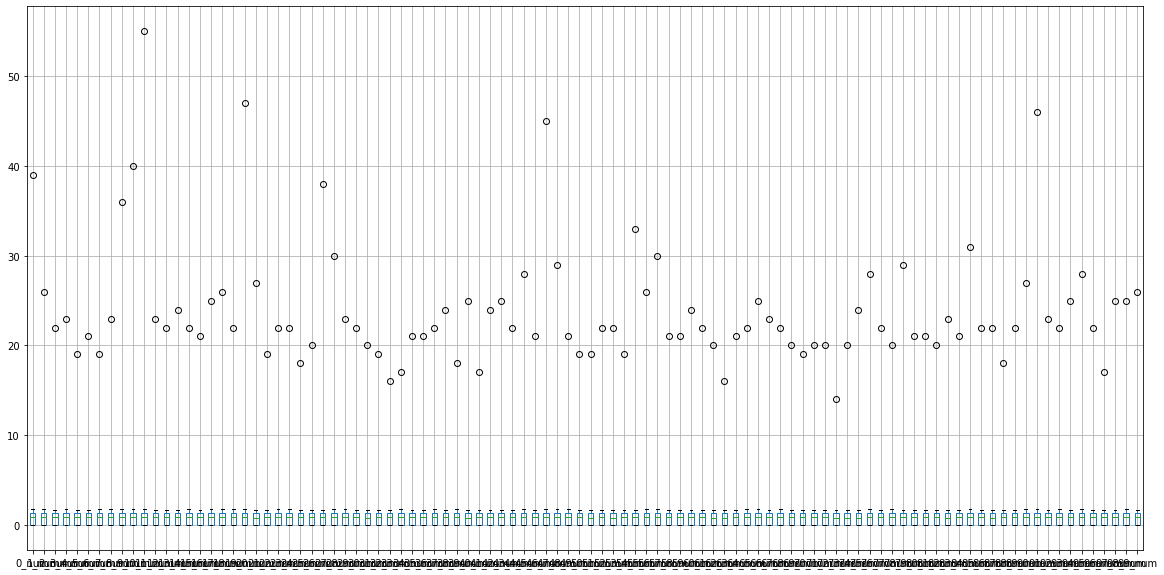

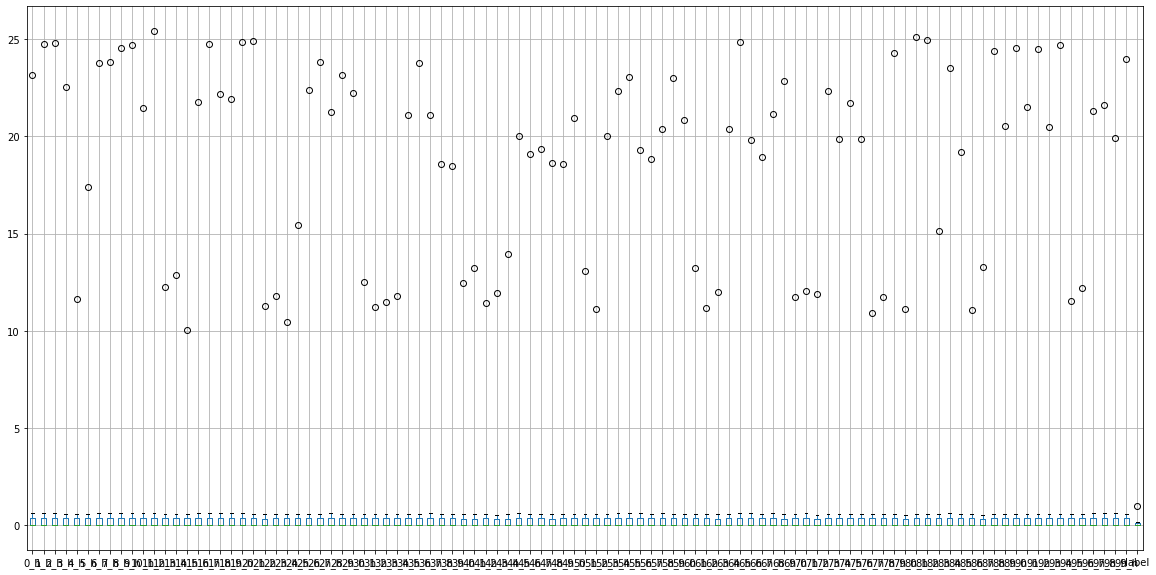

In [25]:
print(df3_total.describe()[1:3])   # 'mean','std','max'

plt.figure(figsize=(20,10))
_ = df3_total.iloc[:,:100].describe(include='all')[1:].boxplot()
plt.figure(figsize=(20,10))
_ = df3_total.iloc[:,100:].describe(include='all')[1:].boxplot()


## Preparation

### Normalisation des données   max= 10 - 35 ???

In [26]:
# train = (train / 255) - 0.5
# test = (test / 255) - 0.5


### Reshape images

In [27]:
# train = np.expand_dims(train, axis=3)
# test = np.expand_dims(test, axis=3)



# KERAS - TENSORFLOW

In [13]:
# Sauvegarde du fichier total 
fileSAVE = DATA_DIR3 + "donnees_LAS_1k_1k.csv"
#fileSAVE = DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv"
df3.to_csv(fileSAVE, index=False)

print(df3_total.shape)

NameError: name 'df3' is not defined

## Lecture du fichier de données

In [14]:
print(tf.keras.datasets)
df4 = pd.read_csv(DATA_DIR3 + "donnees_LAS_1k_1k.csv")
print(df4.shape)
df4.head()

<module 'tensorflow._api.v1.keras.datasets' from '/Users/pl/anaconda3/envs/geo_env/lib/python3.7/site-packages/tensorflow/_api/v1/keras/datasets/__init__.py'>
(29736, 201)


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,10_num,11_num,12_num,13_num,14_num,...,86_h,87_h,88_h,89_h,90_h,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
0,0,0,0,0,0,0,0,6,3,1,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0
1,0,0,0,0,4,3,0,0,0,0,0,0,0,0,3,...,0.17,0.46,0.21,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.3,0.0,0
2,1,2,1,1,0,1,0,0,0,0,0,0,0,0,1,...,0.94,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0


### Changement de la classe en categorial

In [15]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
X = df4.iloc[:,:-1]
y = df4.iloc[:,-1]
y_binary = to_categorical(y)

### Séparation Train - Test

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape, y_binary.shape, y.shape)

(23788, 200) (23788, 2) (5948, 200) (5948, 2) (29736, 2) (29736,)


## Création d'un Modèle Réseau de Neurone "SIMPLE"

In [17]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History 

Nomb_Input = 200
M = 64    # 512-256-128-64-32 ? 
epochs = 20
batch_size = 64
num_class = 2

# ou model = Sequential() + model.add(Dense(N)) + model.add(Dropout(0.5)) + model.add(Activation('softmax'))
model0 = Sequential([
    Dense(M, activation='relu', input_shape=(Nomb_Input,)),
    #Dropout(0.2),
    Dense(M, activation='relu'),
    Dense(M, activation='relu'), #model.add(Dropout(0.2))
    #Dropout(0.2),
    Dense(num_class, activation='softmax')   #
#    Dense(num_class, activation='softmax', output_dim=1,)
])

#    https://keras.io/losses 
#  loss fonctions: categorical_crossentropy, sparse_categorical_crossentropy, mean_squared_error ... etc
#  optimizer: 'sgd', 'adam', keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)


model0.compile(loss="binary_crossentropy", optimizer='adam',
    metrics=['msle', 'accuracy', 'mean_squared_error', 'binary_accuracy', 'categorical_accuracy'])
# NOT loss="categorical_crossentropy",'mean_squared_error'
# NOT optimizer='sgd' 
# NOT metrics=['accuracy', 'mse', 'acc', 'categorical_accuracy',
# 'sparse_categorical_accuracy', 'top_k_categorical_accuracy',
# 'sparse_top_k_categorical_accuracy', 'cosine_proximity', 'clone_metric','clone_metrics']
# ['binary_accuracy', 'fmeasure', 'precision', 'recall'])
# Print with verbose=2 ???
history0 = model0.fit(train_data, train_labels, validation_split=0.33, verbose=2, epochs=epochs, batch_size=batch_size)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15937 samples, validate on 7851 samples
Epoch 1/20
 - 1s - loss: 0.1769 - msle: 0.0182 - accuracy: 0.9652 - mean_squared_error: 0.0366 - binary_accuracy: 0.9652 - categorical_accuracy: 0.9652 - val_loss: 0.1192 - val_msle: 0.0108 - val_accuracy: 0.9773 - val_mean_squared_error: 0.0223 - val_binary_accuracy: 0.9773 - val_categorical_accuracy: 0.9773
Epoch 2/20
 - 1s - loss: 0.0949 - msle: 0.0103 - accuracy: 0.9762 - mean_squared_error: 0.0212 - binary_accuracy: 0.9762 - categorical_accuracy: 0.9762 - val_loss: 0.0982 - val_msle: 0.0098 - val_accuracy: 0.9778 - val_mean_squared_error: 0.0204 - val_binary_accuracy: 0.9778 - val_categorical_accuracy: 0.9778
Epoch 3/20
 - 1s - loss: 0.0708 - msle: 0.0083 - accuracy: 0.9795 - mean_squared_error: 0.0171 - binary_accuracy: 0.9795 - categorical_accuracy: 0.9795 - val_loss: 0.0921 - val_msle: 0.0090 - val_accuracy: 0.9

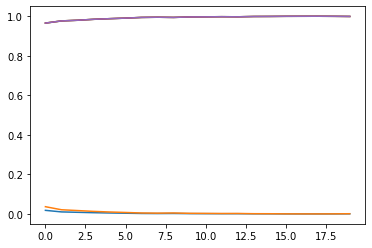

In [18]:
#history0.history
# plot metrics
_ = plt.plot(history0.history['msle'])
_ = plt.plot(history0.history['mean_squared_error'])
_ = plt.plot(history0.history['binary_accuracy'])
_ = plt.plot(history0.history['categorical_accuracy'])
_ = plt.plot(history0.history['accuracy'])
_ = plt.show()

In [19]:
model0.summary()

# model.save_weights('file.h5')

# avec le model construit + les poids
# model.load_weights('file.h5')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                12864     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 21,314
Trainable params: 21,314
Non-trainable params: 0
_________________________________________________________________


### Figures

dict_keys(['val_loss', 'val_msle', 'val_accuracy', 'val_mean_squared_error', 'val_binary_accuracy', 'val_categorical_accuracy', 'loss', 'msle', 'accuracy', 'mean_squared_error', 'binary_accuracy', 'categorical_accuracy'])


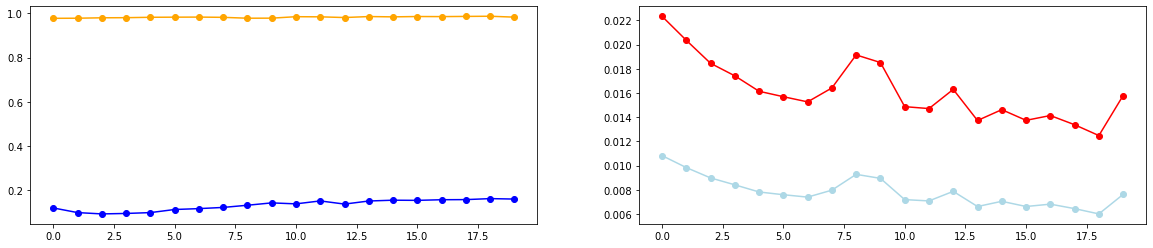

In [20]:
print(history0.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history0.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history0.history.values())[j],'k-o', color=coul[j])

In [21]:
print(history0.history.keys())
print(history0.history['val_accuracy'][-1])
print(history0.history['accuracy'][-1])
print(history0.history['val_loss'][-1])
print(history0.history['loss'][-1])


dict_keys(['val_loss', 'val_msle', 'val_accuracy', 'val_mean_squared_error', 'val_binary_accuracy', 'val_categorical_accuracy', 'loss', 'msle', 'accuracy', 'mean_squared_error', 'binary_accuracy', 'categorical_accuracy'])
0.9826773405075073
0.9987451
0.1593202833635959
0.004612791212468446


Test loss: 0.14809649736407854
Test accuracy: 0.007710543926805258
[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


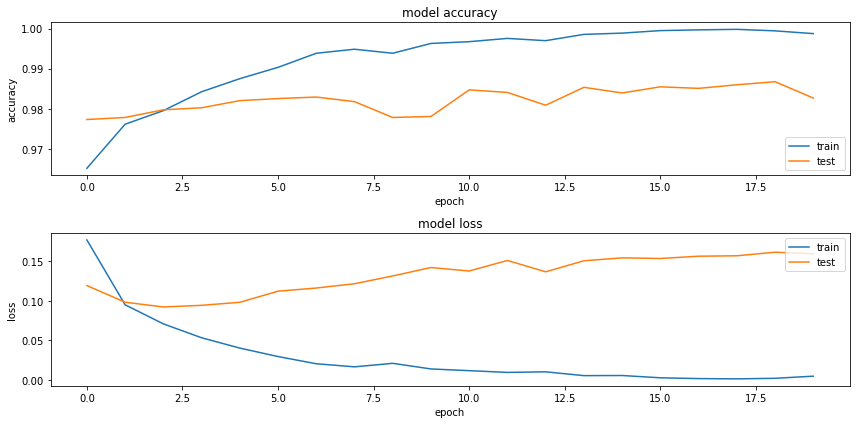

In [22]:
# RESULTATS
score = model0.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model0.predict(test_data, batch_size=batch_size)
predictions = model0.predict(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history0.history['accuracy'])
_ = plt.plot(history0.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history0.history['loss'])
_ = plt.plot(history0.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de Confusion

Echantillon Test: 5948


array([[5764,   60],
       [  43,   81]])

Echantillon Train: 23788


array([[23158,    86],
       [   67,   477]])

Prédit       0.0       1.0
Reel                      
0.0     0.992595  0.304965
1.0     0.010332  0.574468
Predit   0.0  1.0   All
Reel                   
0.0     5764   43  5807
1.0       60   81   141
All     5824  124  5948


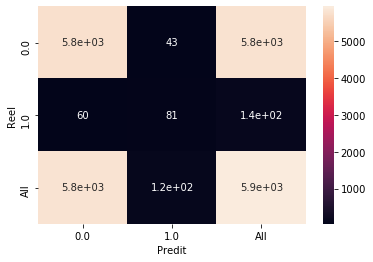

Predit       0.0       1.0  All
Reel                           
0.0     0.496298  0.003702  0.5
1.0     0.212766  0.287234  0.5
All     0.489576  0.010424  0.5


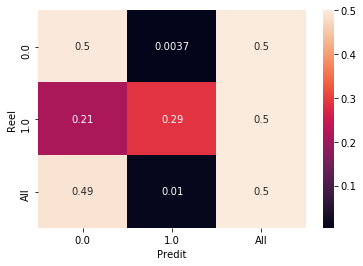

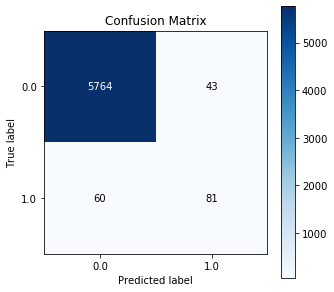

In [23]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y11 = pd.DataFrame(model0.predict(test_data)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
print("Echantillon Test:", len(Y11))
confusion_matrix(Y11, Y10)

Y01 = pd.DataFrame(model0.predict(train_data)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
print("Echantillon Train:", len(Y01))
confusion_matrix(Y01, Y00)

y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')

df_confusion = pd.crosstab(y_reel, y_pred)

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print(df_confusion)
_ = sns.heatmap(df_confusion, annot=True)
plt.show()

df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print(df_conf_norm)
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

######### NOT WORKING ???
#from pandas_ml import ConfusionMatrix
#confusion_matrix = ConfusionMatrix(y_reel, y_pred)
#confusion_matrix.plot()
#plt.show()
#confusion_matrix.plot(normalized=True)
#plt.show()

#binary_confusion_matrix = ConfusionMatrix(y_true, y_pred)
#print("Binary confusion matrix:\n%s" % binary_confusion_matrix)
#print(binary_confusion_matrix.TP) # TN, FP, FN, ...
#binary_confusion_matrix.plot(normalized=False)
#binary_confusion_matrix.plot(normalized=True, backend='seaborn')
#plt.show()
#confusion_matrix.print_stats()
#confusion_matrix.stats()
##########


skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))

,0_true,0_pred,0_pred2,diff
0,0,1.298454e-03,0.0,0.0
1,0,5.119847e-24,0.0,0.0


,0_true,0_pred,0_pred2,diff
0,0,1.323312e-19,0.0,0.0
1,0,2.786534e-09,0.0,0.0


(5948, 4) (23788, 4)
(5807, 4) (141, 4) (23225, 4) (563, 4)
ERREURS: 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     37.243867
0_pred2    43.000000
diff      -43.000000
dtype: float64 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     17.095939
0_pred2     0.000000
diff        0.000000
dtype: float64
0.017316745124411566


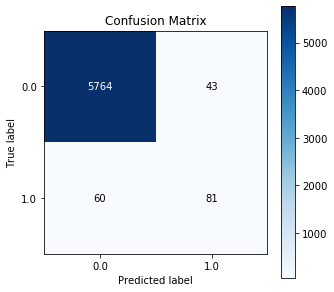

array([[5764,   43],
       [  60,   81]])

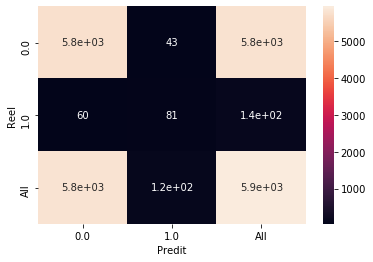

In [24]:
import scikitplot as skplt

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def tab_result(df_a, df_b):
    # Extrait les matrices binaires en 1 seule colonne
    y_pred = pd.DataFrame(model0.predict(df_b)[:,1:])
    y_true = pd.DataFrame(df_a[:,1:])
    # création de la table
    dy = y_true.merge(y_pred, left_index=True, right_index=True, suffixes=('_true', '_pred'))
    dy['0_true'] = dy['0_true'].astype(int)
    dy['0_pred2'] = dy['0_pred'].round(0)   #arrondi à l'entier le + proche
    dy['diff'] = dy['0_true'] - dy['0_pred2']
    return dy

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

dy1 = tab_result(test_labels, test_data)
dy2 = tab_result(train_labels, train_data)
dy1.head(2)
dy2.head(2)
df_test_1, df_test_0, df_train_1, df_train_0 = lampe_results(dy1, dy2)

print(dy1.shape, dy2.shape)
print(df_test_1.shape, df_test_0.shape, df_train_1.shape, df_train_0.shape)
#print(df_test_0.describe())
true_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 1)].sum()
fals_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 0)].sum()
fals_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 1)].sum()
true_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 0)].sum()
print("ERREURS:", true_pos1, fals_pos1, fals_neg1, true_neg1)
#####################################
# sensitivity-recall : TPR = TP/P = TP / (TP + FN)
# specificity-select : TNR = TN/N = TN / (TN + FP)
# balance : = (TPR + TNR) / 2
# precision          : TP / (TP + FP)

# accuracy    : ACC = (TP + TN) / total
# FI score    :  2 * TP / (2 TP + FP + FN) == 2 / (1/precision + 1/recall)
#####################################


# calcul pour LOSS du Mean Squared Error
print(mse_loss(y_reel, y_pred))

_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()

confusion_matrix(dy1['0_true'], dy1['0_pred2'])
sns.heatmap(df_confusion, annot=True)
plt.show()

In [36]:
y_true2 = [x for x in test_labels if x != 0]
y_pred2 = model0.predict(test_data)
print(len(y_true2), len(y_pred2))
print(mse_loss(y_true2, y_pred2))

egaux = [(a,b) for a in np.ndarray.tolist(y_true2) for b in np.ndarray.tolist(y_pred2) if a == b]
differents = [(a,b) for a in np.ndarray.tolist(y_true2) for b in np.ndarray.tolist(y_pred2) if a == b]
print(len(y_true2), len(egaux), len(differents))

from scipy import stats
stats.describe(y_true2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# KERAS :  images bi-dimensionelles

## Lecture du fichier de données

In [28]:
#fichier = DATA_DIR3 + "donnees_LAS_Numpy_3500.npy"
data1 = np.load(fichier)
print(data1.shape)
Nomb_Input = data1.shape

(20352, 10, 10)


In [29]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données

X = data1
y = liste_y
y_binary = to_categorical(y)

train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels))
print(y_binary.shape, len(y))

#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)

train_data = train_data.reshape(train_data.shape[0], 10, 10, 1)
test_data  = test_data.reshape(test_data.shape[0], 10, 10, 1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels))


(16281, 10, 10) 16281 (4071, 10, 10) 4071
(20352, 2) 20352
(16281, 10, 10, 1) 16281 (4071, 10, 10, 1) 4071


## Modèle CNN 2D

In [97]:
# 1) Trains a simplet CONVNET on the MNIST dataset

input_shape = (10, 10, 1)     #input_shape = (10, 10, 2)
num_classes = 2
epochs = 10

num_filters = 8
filter_size = 3
pool_size = 2

model2 = Sequential([
    Conv2D(num_filters, filter_size, padding="same", strides=(1,1), input_shape=input_shape),
    Conv2D(num_filters, filter_size, padding="same", strides=(1,1)),
    Conv2D(num_filters, filter_size, padding="same", strides=(1,1)),
    #Conv2D(num_filters, filter_size),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(num_classes, activation='softmax'),
])

#model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
model2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(test_data, test_labels))

score = model2.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 16281 samples, validate on 4071 samples
Epoch 1/10
16281/16281 [==============================] - 2s 126us/step - loss: 0.1129 - accuracy: 0.9819 - val_loss: 0.0939 - val_accuracy: 0.9828
Epoch 2/10
16281/16281 [==============================] - 2s 100us/step - loss: 0.0883 - accuracy: 0.9826 - val_loss: 0.0933 - val_accuracy: 0.9828
Epoch 3/10
16281/16281 [==============================] - 2s 101us/step - loss: 0.0853 - accuracy: 0.9825 - val_loss: 0.0918 - val_accuracy: 0.9826
Epoch 4/10
16281/16281 [==============================] - 2s 99us/step - loss: 0.0840 - accuracy: 0.9827 - val_loss: 0.0906 - val_accuracy: 0.9826
Epoch 5/10
16281/16281 [==============================] - 2s 100us/step - loss: 0.0824 - accuracy: 0.9826 - val_loss: 0.0904 - val_accuracy: 0.9821
Epoch 6/10
16281/16281 [==============================] - 2s 100us/step - loss: 0.0812 - accuracy: 0.9826 - val_loss: 0.0928 - val_accuracy: 0.9826
Epoch 7/10
16281/16281 [==============================] - 2s 100

In [92]:
model2.summary()

# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 10, 10, 8)         80        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 5, 5, 8)           584       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 8)           0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 2, 2, 8)           584       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 1, 8)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 8)               

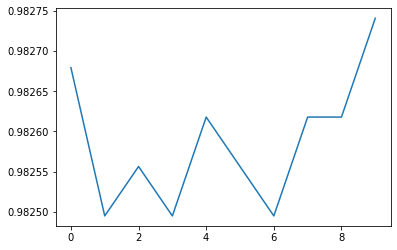

In [93]:
#history0.history
# plot metrics
#_ = plt.plot(history2.history['binary_accuracy'])
_ = plt.plot(history2.history['accuracy'])
_ = plt.show()

### Figures

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


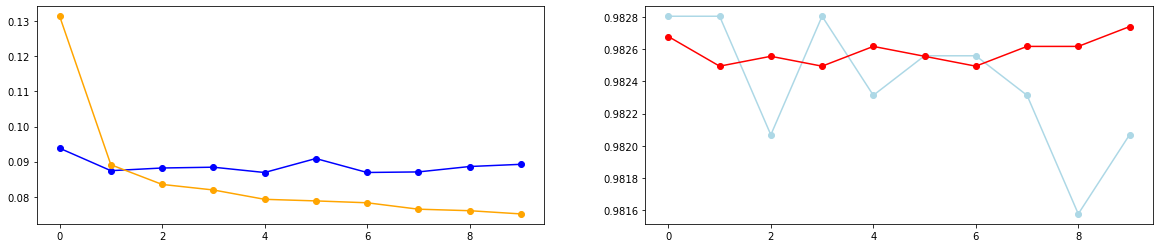

In [94]:
print(history2.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history2.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history2.history.values())[j],'k-o', color=coul[j])

Test loss: 0.08923466153281806
Test accuracy: 0.9820683002471924
[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


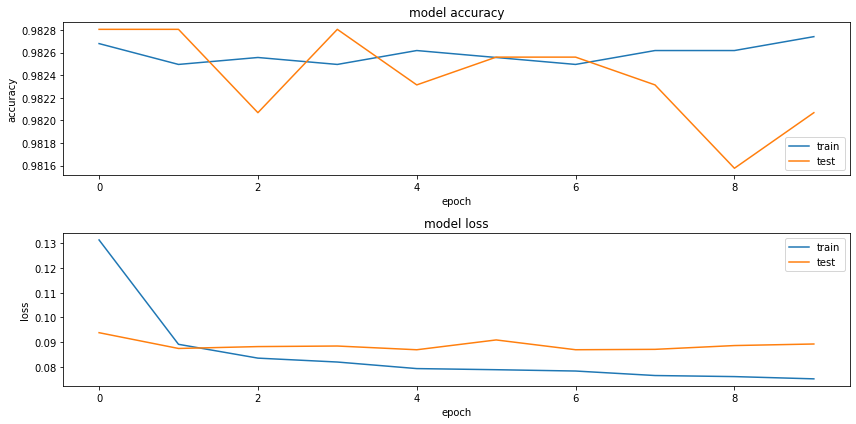

In [95]:
# RESULTATS
score = model2.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model2.predict(test_data, batch_size=batch_size)
predictions = model2.predict(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history2.history['accuracy'])
_ = plt.plot(history2.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history2.history['loss'])
_ = plt.plot(history2.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

Echantillon Test: 4071


array([[3998,   70],
       [   3,    0]])

Echantillon Train: 16281


array([[15999,   280],
       [    0,     2]])

Prédit       0.0       1.0
Reel                      
0.0     0.999250  0.042857
1.0     0.017496  0.000000
Predit   0.0  1.0   All
Reel                   
0.0     3998    3  4001
1.0       70    0    70
All     4068    3  4071


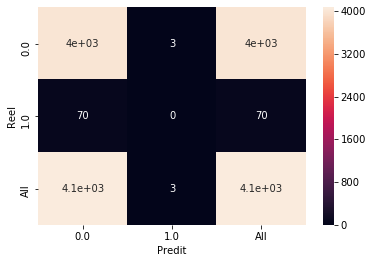

Predit       0.0       1.0  All
Reel                           
0.0     0.499625  0.000375  0.5
1.0     0.500000  0.000000  0.5
All     0.499632  0.000368  0.5


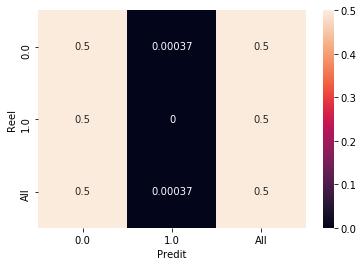

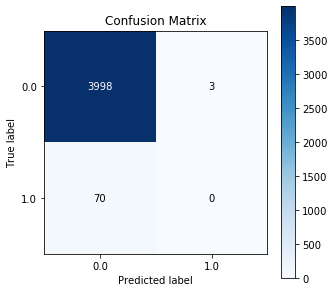

In [96]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y11 = pd.DataFrame(model2.predict(test_data)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
print("Echantillon Test:", len(Y11))
confusion_matrix(Y11, Y10)

Y01 = pd.DataFrame(model2.predict(train_data)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
print("Echantillon Train:", len(Y01))
confusion_matrix(Y01, Y00)

y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')

df_confusion = pd.crosstab(y_reel, y_pred)

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print(df_confusion)
_ = sns.heatmap(df_confusion, annot=True)
plt.show()

df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print(df_conf_norm)
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

#
skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))